## 2.2. Visualizing
Now that we have a structured dataset, we can visualize it to try to identify patterns in the data, and look for potential statistical correlations. The patterns that are found in the dataset inform the order in which the predictions would be structured. For instance, once we know on which days the households may shop, we can identify another variable has the highest correlation to the day variable. If that variable would for instance be the type of store, then this becomes the next variable we could look at (i.e., if day is a predictor for store type, subsequently store type may be a predictor for amount of items bought, and so on). Since the dataset is limited, we also rely heavily on visual diagrams and further inform our decisions on knowledge gained from the households grocery habits through our qualitative interviews.

In this section we:
- Create & export a confusion matrix
- Analyze visualizations and correlations for all relevant variables

### Import libraries 

In [1]:
# %matplotlib notebook
%matplotlib inline
#Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
from matplotlib.pyplot import figure

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

# importing the required function for CHI2 tests
from scipy.stats import chi2_contingency

### Load and view data 

In [2]:
df = pd.read_csv (r"/workspaces/DesignerlyAlgorithmicPrototyping/database/DATA-HH (dummy).csv")

# del df["HH"]
df.describe(include='all')

,week,order_ID,item_name,amount,price_unit,price_total,date,day,timestamp,time,...,item_id,type_id,order_amount,order_price,day_num,storetype_num,storename_num,cat_num,time_num,promo_num
count,353.000000,353.00000,353,353.000000,353.000000,353.000000,353,353,353,353,...,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
unique,NaN,NaN,297,NaN,NaN,NaN,22,7,34,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,GROF BROOD GESN.,NaN,NaN,NaN,2022-01-08,Saturday,17:25:00,morning,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,NaN,NaN,NaN,45,86,43,181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.056657,19.21813,NaN,1.288952,2.522425,2.801603,NaN,NaN,NaN,NaN,...,147.586402,41.657224,30.977337,69.994978,2.643059,3.382436,4.283286,7.473088,1.388102,0.053824
std,2.052484,10.48920,NaN,1.131329,1.835082,1.925387,NaN,NaN,NaN,NaN,...,91.236450,33.652786,15.869659,35.943440,1.565815,1.368654,2.383461,4.059219,0.882001,0.225991
min,1.000000,1.00000,NaN,1.000000,0.064680,0.064680,NaN,NaN,NaN,NaN,...,0.000000,0.000000,1.000000,2.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,10.00000,NaN,1.000000,1.290000,1.518920,NaN,NaN,NaN,NaN,...,67.000000,14.000000,26.000000,60.660000,2.000000,4.000000,3.000000,6.000000,1.000000,0.000000
50%,4.000000,18.00000,NaN,1.000000,2.080000,2.400000,NaN,NaN,NaN,NaN,...,147.000000,33.000000,34.000000,72.487014,3.000000,4.000000,6.000000,9.000000,2.000000,0.000000
75%,5.000000,26.00000,NaN,1.000000,3.150000,3.680000,NaN,NaN,NaN,NaN,...,223.000000,66.000000,38.000000,103.329980,4.000000,4.000000,6.000000,11.000000,2.000000,0.000000


<Axes: >

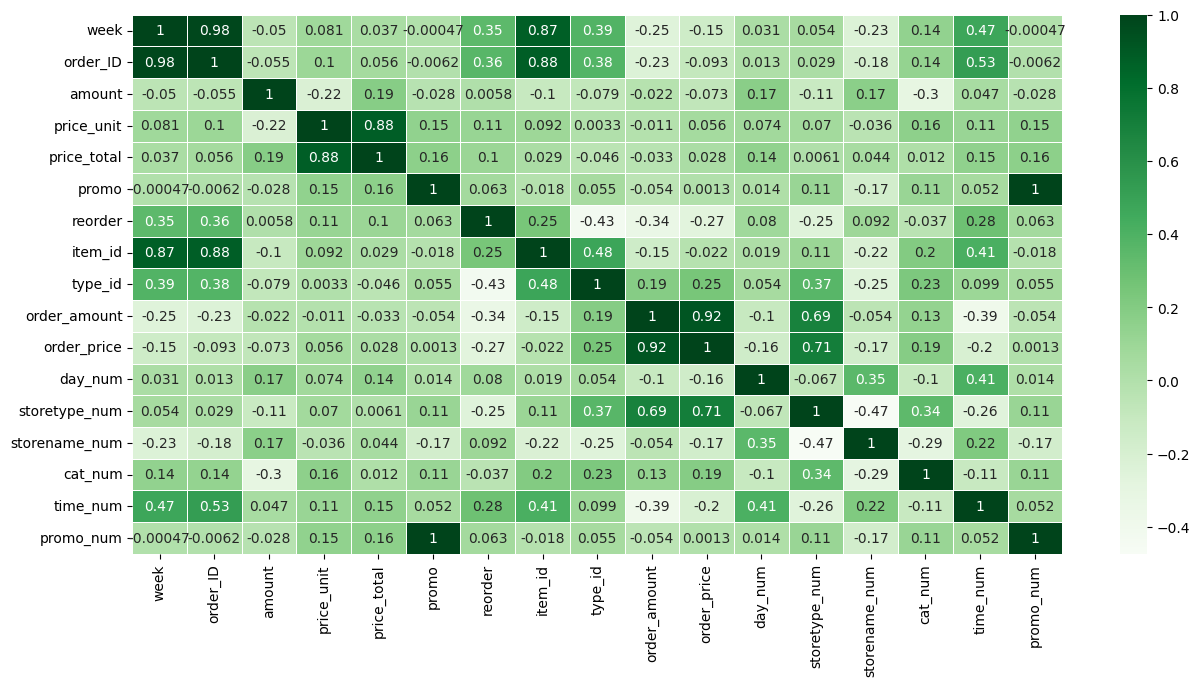

In [3]:
df_corr = pd.read_csv (r"/workspaces/DesignerlyAlgorithmicPrototyping/database/DATA-HH (dummy).csv")
df_corr.drop(['item_name', 'date', 'day', 'time', 'store_type', 'timestamp', 'store_name', 'item_type', 'category'], axis=1, inplace=True)

# use the corr function to display the correlation between all the features
data_corr = df_corr.corr()

#plotting correlation matrix 
fig, ax = plt.subplots(figsize=(15,7))         # Sample figsize in inches
sns.heatmap(data_corr, cmap="Greens", annot=True, linewidth=.5)

## 2.2.1. DAYS

### 2.2.1.1. Is there a correlation between day (of week) and week?

In [4]:
# Create a dataframe for just the orders (not all individual items)
df_orders = df.loc[:, ('week','order_ID', 'store_name', 'storename_num', 'store_type', 'storetype_num','day', 'day_num', 'time', 'time_num', 'timestamp', 'order_amount', 'order_price')]
df_orders = df_orders.drop_duplicates()
df_orders.head()

,week,order_ID,store_name,storename_num,store_type,storetype_num,day,day_num,time,time_num,timestamp,order_amount,order_price
0,1,1,Okay,6,supermarket,4,Tuesday,5,noon,3,12:32:00,9,16.77000
5,1,2,baker,7,bakery,0,Tuesday,5,noon,3,12:39:00,7,6.10000
8,1,4,Delhaize,3,supermarket,4,Friday,0,afternoon,0,17:25:00,50,103.32998
51,2,5,Albert Heijn,0,supermarket,4,Wednesday,6,morning,2,11:43:00,1,3.99000
52,2,6,baker,7,bakery,0,Wednesday,6,morning,2,09:57:00,9,7.70000


In [5]:
# Cross tabulation between DAY and WEEK
CrosstabResult=pd.crosstab(index=df_orders['week'],columns=df_orders['day'])
CrosstabResult

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
week,,,,,,,
1,1,0,0,0,0,2,0
2,0,0,0,3,2,0,2
3,0,0,1,2,1,0,0
4,0,0,1,3,0,0,1
5,0,2,3,0,0,2,0
6,0,0,1,1,0,0,0
7,0,1,1,0,1,0,0
8,1,2,0,0,1,0,1


We can see that this households shopping habits vary quite a lot per week. Generally we can only note that they do more grocery trips per day in the weekends (Saturday, Sunday)

In [6]:
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.11764737032340955


There is no correlation: indication of a pattern? (keep in mind that the dataset is limited; this is just an indication)


#### Can we check whether shopping days are predictable over longer time periods?
(e.g.: every two weeks, they go shopping in the weekend)

In [7]:
#Let's try grouping per two (consecutive) dats
df_orders['week'] = df_orders['week'].replace([1, 2], 1)
df_orders['week'] = df_orders['week'].replace([3, 4], 2)
df_orders['week'] = df_orders['week'].replace([5, 6], 3)
df_orders['week'] = df_orders['week'].replace([7, 8], 4)

In [8]:
# Cross tabulation between DAY and WEEK
CrosstabResult=pd.crosstab(index=df_orders['week'],columns=df_orders['day'])
CrosstabResult

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
week,,,,,,,
1,1,0,0,3,2,2,2
2,0,0,2,5,1,0,1
3,0,2,4,1,0,2,0
4,1,3,1,0,2,0,1


In [9]:
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.07564485806037874


> Are the first 4 weeks different from the last 4?

In [10]:
df = pd.read_csv (r"/workspaces/DesignerlyAlgorithmicPrototyping/database/DATA-HH (dummy).csv")
df_orders = df.loc[:, ('week','order_ID', 'store_name', 'storename_num', 'store_type', 'storetype_num','day', 'day_num', 'time', 'time_num', 'timestamp', 'order_amount', 'order_price')]
df_orders = df_orders.drop_duplicates()

In [11]:
# group per period 1 and 2
df_orders['week'] = df_orders['week'].replace([1, 2, 3, 4], 1)
df_orders['week'] = df_orders['week'].replace([5, 6, 7, 8], 2)

In [12]:
# Cross tabulation between DAY and WEEK
CrosstabResult=pd.crosstab(index=df_orders['week'],columns=df_orders['day'])
CrosstabResult

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
week,,,,,,,
1,1,0,2,8,3,2,3
2,1,5,5,1,2,2,1


In [13]:
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.04533490564921316


The first period seems to differ from the second period overall, but are there patterns in each separate period?

In [14]:
df = pd.read_csv (r"/workspaces/DesignerlyAlgorithmicPrototyping/database/DATA-HH (dummy).csv")
df_orders = df.loc[:, ('week','order_ID', 'store_name', 'storename_num', 'store_type', 'storetype_num','day', 'day_num', 'time', 'time_num', 'timestamp', 'order_amount', 'order_price')]
df_orders = df_orders.drop_duplicates()

# split up df to first and second period
df_period1 = df_orders[df_orders['week'] < 5]
df_period2 = df_orders[df_orders['week'] > 4]

In [15]:
# Cross tabulation between DAY and WEEK
CrosstabResult1=pd.crosstab(index=df_period1['week'],columns=df_period1['day'])
CrosstabResult2=pd.crosstab(index=df_period2['week'],columns=df_period2['day'])

CrosstabResult1

day,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday
week,,,,,,
1,1,0,0,0,2,0
2,0,0,3,2,0,2
3,0,1,2,1,0,0
4,0,1,3,0,0,1


> At least it seems they never shopped on Monday during the first period, rarely on Tuesday. They shopped on Sunday often (multiple trips). 

In [16]:
CrosstabResult2

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
week,,,,,,,
5,0,2,3,0,0,2,0
6,0,0,1,1,0,0,0
7,0,1,1,0,1,0,0
8,1,2,0,0,1,0,1


In [17]:
# Performing Chi-sq test
ChiSqResult1 = chi2_contingency(CrosstabResult1)
ChiSqResult2 = chi2_contingency(CrosstabResult2)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test 1 is:', ChiSqResult1[1])
print('The P-Value of the ChiSq Test 2 is:', ChiSqResult2[1])

The P-Value of the ChiSq Test 1 is: 0.06396998573316603
The P-Value of the ChiSq Test 2 is: 0.2952656910325318


> Overall, we learn that there isn't really a generalizable pattern in this households shopping trips. It is hard to point to set days on which they do/don't shop.

+ We can however still look to see if they make a similar amount of shopping trips each week.
+ And we can check if there is a difference between weekends and weekdays

### 2.2.1.2. Trips per week

In [18]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day'] = pd.Categorical(df['day'], categories=days, ordered=True)
df_dow = df.sort_values(by=['week','day'])

# grouping the variables for week, day and unique order id's
df_dow = df.groupby(['week', 'day'], observed = False)['order_ID'].nunique()
df_dow = pd.DataFrame (df_dow)
df_dow.head()

# make grid for days vs. week
df_dowgrid1 = df_dow.groupby(['week', 'day'], observed = False)['order_ID'].aggregate('first').unstack()
df_dowgrid1 = df_dowgrid1.reset_index()
df_dowgrid1.replace(0, np.nan, inplace=True)
df_dowgrid1

# second grid to generate extra variables
df_dowgrid2 = df_dowgrid1.copy()
del df_dowgrid2["week"]
# column for total grocery visits
df_dowgrid1['sum'] = df_dowgrid2.sum(axis=1)
# column for total days shopped
df_dowgrid1['ndays'] = df_dowgrid2.count(axis=1)
# column for median visits/week
df_dowgrid1['med'] = df_dowgrid2.median(numeric_only=True, axis=1)

df_dowgrid1 = df_dowgrid1.round(0)

In [19]:
# Make sure the numbers are rounded
df_dowgridNUM = df_dowgrid1.round(0)

# Drop irrelevant variables for the purpose of seeing amount of visits/week
df_dowgridNUM.drop(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], axis=1, inplace=True)

# Show the table (and replace NaN with 0)
df_dowgridNUM.replace(np. nan,0)

day,week,sum,ndays,med
0,1,3.0,2,2.0
1,2,7.0,3,2.0
2,3,4.0,3,1.0
3,4,5.0,3,1.0
4,5,7.0,3,2.0
5,6,2.0,2,1.0
6,7,3.0,3,1.0
7,8,5.0,4,1.0


> There really are a set amount of days on which they shop: 3 or 4.

> The amount of trips on those days can vary (e.g. when they go the the supermarket ánd butcher ánd bakery on one shopping day vs when they don't do that another week).

> Generally they would go shopping just once or twice per shopping day.

### 2.2.1.3. Weekends vs weekdays

In [20]:
# Make sure the numbers are rounded
df_dowgridWEEK = df_dowgrid1.round(0)
df_dowgridWEEK = df_dowgridWEEK.replace(np. nan,0)

# Aggregate weekdays and weekends
## Define a custom function to combine columns
def combine_columns(row):
    return (row['Monday']) + row['Tuesday'] + row['Wednesday']+ row['Thursday']+ row['Friday']
## Apply the custom function to create a new column 'Combined'
df_dowgridWEEK['Weekdays'] = df_dowgridWEEK.apply(combine_columns, axis=1)

df_dowgridWEEK['Weekends'] = df_dowgridWEEK['Saturday'] + df_dowgridWEEK['Sunday']

## normalize weekend (2days) vs weekdays(5days) by multiplying with 2.5 (5/2=2.5)
df_dowgridWEEK.loc[:, ("Weekends (normalized)")] = df_dowgridWEEK["Weekends"] * 2.5

# Drop irrelevant variables for the purpose of seeing the difference between weekdays and weekends.
df_dowgridWEEK.drop(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'ndays', 'med', 'sum'], axis=1, inplace=True)

In [21]:
df_dowgridWEEK

day,week,Weekdays,Weekends,Weekends (normalized)
0,1,3.0,0.0,0.0
1,2,4.0,3.0,7.5
2,3,1.0,3.0,7.5
3,4,1.0,4.0,10.0
4,5,4.0,3.0,7.5
5,6,0.0,2.0,5.0
6,7,2.0,1.0,2.5
7,8,5.0,0.0,0.0


> IF they shop on weekends, it is likely multiple visits. Shoping during the week does not excluded shopping in the weekend.

### CONCLUSION (2.2.1. DAYS)

Data to build the algorithm:
> 1. Number of visits per day (per week)

> 2. Assign weights to each day (based on times shopped on these days)
    
    
We then have the first given:
> 1. Week 9: HH2 will shop on <b>Monday/Tuesday/..., X times</b>

## 2.2.2. STORE TYPE/NAME

From the correlation heatmap we knew that there was a correlation of 0.33 between day and store name, and only 0.07 with store stype. This is at least interesting enough to explore further. Let's try to visualize these correlations and figure out what they can tell us, if anything.

### 2.2.2.1. check correlation per store TYPE

In [22]:
df = pd.read_csv (r"/workspaces/DesignerlyAlgorithmicPrototyping/database/DATA-HH (dummy).csv")
df_orders = df.loc[:, ('week','order_ID', 'store_name', 'storename_num', 'store_type', 'storetype_num','day', 'day_num', 'time', 'time_num', 'timestamp', 'order_amount', 'order_price')]
df_orders.drop_duplicates(inplace=True)

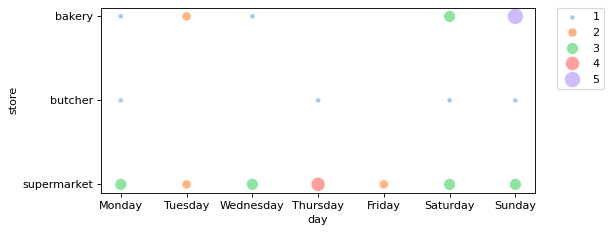

In [23]:
df_nunique = df.groupby(['day', 'store_type'])['order_ID'].nunique()
df_nunique = pd.DataFrame (df_nunique)
df_nunique = df_nunique.reset_index()
df_nunique = df_nunique.loc[~(df_nunique==0).any(axis=1)]


#order x and y axis chronologically
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_nunique['day'] = pd.Categorical(df_nunique['day'], order)
df_nunique.sort_values(by=['day'], inplace=True)


# select the x and y features
x = df_nunique['day']# select the x feature
y = df_nunique['store_type']# select the y feature

# select the feature that decides the colors
colors = df_nunique['order_ID'] # select the color column

# select the feature that will decide the size of the circle (and divide the value by 1000 for reshaping in the plot)
size = df_nunique['order_ID'] # select the column for the size and divide it by 1000 (/ 1000)

# fit the points with the scatter function
figure(figsize=(7, 3), dpi=80)
sns.scatterplot(x=x, y=y, palette="pastel", hue=colors, size=size, sizes=(20,200))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#repeat ChiSq value
current_corr = round(ChiSqResult[1], 2)

# give the graph a title and labels
plt.xlabel("day")
plt.ylabel('store')
# plt.title(f"The correlation between day & store type (r={current_corr})")

# call the graph (show function)
plt.grid(False)
plt.show()

> The only thing we can note here is that they go to the bakery more often during the weekend, while they do go to the supermarket during the weekends, but more often during the week (middle of the week: Wednesday and Thursday). Butcher and other stores are scattered across the week.

In [24]:
df = pd.read_csv (r"/workspaces/DesignerlyAlgorithmicPrototyping/database/DATA-HH (dummy).csv")
df_orders = df.loc[:, ('week','order_ID', 'store_name', 'storename_num', 'store_type', 'storetype_num','day', 'day_num', 'time', 'time_num', 'timestamp', 'order_amount', 'order_price')]
df_orders.drop_duplicates(inplace=True)

# Cross tabulation between DAY and STORE TYPE
CrosstabResult=pd.crosstab(index=df_orders['store_type'],columns=df_orders['day'])
display(CrosstabResult)

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
store_type,,,,,,,
bakery,0,1,3,5,0,2,1
butcher,0,1,1,1,1,0,0
supermarket,2,3,3,3,4,2,3


> This just confirms our previous observations. Only the bakery seems to be visited more often during the weekend, and the supermarket mostly middle of the week, but also during the weekends.

In [25]:
df = pd.read_csv (r"/workspaces/DesignerlyAlgorithmicPrototyping/database/DATA-HH (dummy).csv")
df_orders = df.loc[:, ('week','order_ID', 'store_name', 'storename_num', 'store_type', 'storetype_num','day', 'day_num', 'time', 'time_num', 'timestamp', 'order_amount', 'order_price')]
df_orders.drop_duplicates(inplace=True)

# aggregate weekday and weekend
df_orders.loc[:,('day')] = df_orders.loc[:,('day')].replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], 'weekday')
df_orders.loc[:,('day')] = df_orders.loc[:,('day')].replace(['Saturday', 'Sunday'], 'weekend')

# aggregate "other" store types
df_orders.loc[:,('store_type')] = df_orders.loc[:,('store_type')].replace(['drugstore', 'furniture store'], 'other')
# df_orders['store_type'] = df_orders['store_type'].replace(['bakery', 'butcher'], 'bakery/butcher')

# Cross tabulation between DAY and STORE NAME
CrosstabResult=pd.crosstab(index=df_orders['store_type'],columns=df_orders['day'], normalize=False)
## normalize weekend (2days) vs weekdays(5days) by multiplying with 2.5 (5/2=2.5)
CrosstabResult.loc[:, ("weekend")] = CrosstabResult["weekend"] * 2.5
display(CrosstabResult)

day,weekday,weekend
store_type,,
bakery,4,20
butcher,2,5
supermarket,14,15


> CONCLUSION: when we normalize the weekend grocery trips vs the week trips, it is indeed clear that the bakery is something for during the weekends mostly. Supermarkets are visited equally during the week and weekends. And butchers mainly during the weekends, but just barely (also keep in mind again the limited dataset).  

Can we find out more about the supermarket habits? Let's get more specific:
### 2.2.2.2.  check correlation per store NAME

In [26]:
df = pd.read_csv (r"/workspaces/DesignerlyAlgorithmicPrototyping/database/DATA-HH (dummy).csv")
df_orders = df.loc[:, ('week','order_ID', 'store_name', 'storename_num', 'store_type', 'storetype_num','day', 'day_num', 'time', 'time_num', 'timestamp', 'order_amount', 'order_price')]
df_orders.drop_duplicates(inplace=True)

In [27]:
# Cross tabulation between DAY and STORE NAME
CrosstabResult=pd.crosstab(index=df_orders['store_name'],columns=df_orders['day'])
display(CrosstabResult) 

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
store_name,,,,,,,
Albert Heijn,1,3,0,1,2,0,3
Carrefour,0,0,1,0,0,0,0
Delhaize,1,0,0,2,0,0,0
Okay,0,0,2,0,2,2,0
baker,0,1,3,5,0,2,1
butcher,0,1,1,1,1,0,0


In [28]:
# Drop stores that are not supermarkets
df_orderssup = df_orders.loc[~((df_orders['store_name'] == 'Brabo') | (df_orders['store_name'] == 'Ikea') | (df_orders['store_name'] == 'Kruidvat') | (df_orders['store_name'] == 'Sys') | (df_orders['store_name'] == 'Versavel Poelman'))]

# Cross tabulation between DAY and STORE NAME
CrosstabResult=pd.crosstab(index=df_orderssup['store_name'],columns=df_orderssup['day'])
display(CrosstabResult) 

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
store_name,,,,,,,
Albert Heijn,1,3,0,1,2,0,3
Carrefour,0,0,1,0,0,0,0
Delhaize,1,0,0,2,0,0,0
Okay,0,0,2,0,2,2,0
baker,0,1,3,5,0,2,1
butcher,0,1,1,1,1,0,0


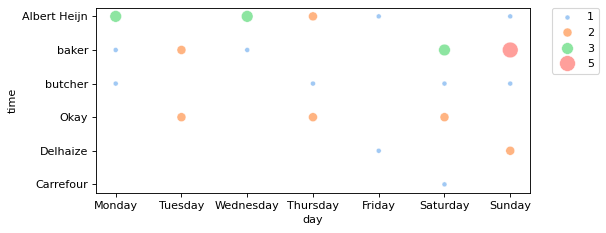

In [29]:
df = df.loc[~((df['store_name'] == 'Brabo') | (df['store_name'] == 'Ikea') | (df['store_name'] == 'Kruidvat') | (df['store_name'] == 'Sys') | (df['store_name'] == 'Versavel Poelman'))]
df_nunique = df.groupby(['day', 'store_name'])['order_ID'].nunique()
df_nunique = pd.DataFrame (df_nunique)
df_nunique = df_nunique.reset_index()
df_nunique = df_nunique.loc[~(df_nunique==0).any(axis=1)]

#order x and y axis chronologically
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_nunique['day'] = pd.Categorical(df_nunique['day'], order)
df_nunique.sort_values(by=['day'], inplace=True)


# select the x and y features
x = df_nunique['day']# select the x feature
y = df_nunique['store_name']# select the y feature

# select the feature that decides the colors
colors = df_nunique['order_ID'] # select the color column

# select the feature that will decide the size of the circle (and divide the value by 1000 for reshaping in the plot)
size = df_nunique['order_ID'] # select the column for the size and divide it by 1000 (/ 1000)

# fit the points with the scatter function
figure(figsize=(7, 3), dpi=80)
sns.scatterplot(x=x, y=y, palette="pastel", hue=colors, size=size, sizes=(20,200))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#repeat ChiSq value
current_corr = round(ChiSqResult[1], 2)

# give the graph a title and labels
plt.xlabel("day")
plt.ylabel('time')

# call the graph (show function)
plt.grid(False)
plt.show()

In [30]:
# Drop stores that are not supermarkets
df_orders = df_orders.loc[~((df_orders['store_name'] == 'Brabo') | (df_orders['store_name'] == 'Ikea') | (df_orders['store_name'] == 'Kruidvat') | (df_orders['store_name'] == 'Sys') | (df_orders['store_name'] == 'Versavel Poelman'))]

# aggregate weekday and weekend
df_orders.loc[:,('day')] = df_orders.loc[:,('day')].replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], 'weekday')
df_orders.loc[:,('day')] = df_orders.loc[:,('day')].replace(['Saturday', 'Sunday'], 'weekend')

# Cross tabulation between DAY and STORE NAME
CrosstabResult=pd.crosstab(index=df_orders['store_name'],columns=df_orders['day'])

## normalize weekend (2days) vs weekdays(5days) by multiplying with 2.5 (5/2=2.5)
CrosstabResult.loc[:, ("weekend")] = CrosstabResult["weekend"] * 2.5
display(CrosstabResult)

/tmp/ipykernel_12287/3606972332.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 2.5  2.5  5.   5.  20.   5. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  CrosstabResult.loc[:, ("weekend")] = CrosstabResult["weekend"] * 2.5


day,weekday,weekend
store_name,,
Albert Heijn,9,2.5
Carrefour,0,2.5
Delhaize,1,5.0
Okay,4,5.0
baker,4,20.0
butcher,2,5.0


> Albert Heijn (supermarket) seems to be a store they would much more often visit during the week. Okay (supermarket) then again does not really seem to matter week vs weekend. Delhaize and Carrefour (supermarkets) finally are much more often visited during the weekend. 

#### CONCLUSION (2.2.2. Store)
We now have an idea for the first two steps in generating week 9 groceries:
> 1. It is <b>day X</b>

> 2. The HH will shop at <b>store NAME X</b> (linked to day of the week)

The decision to select store name and not store type is because the shopping habits of this household on which store they visit when (which day of the week) really do seem different vs. Albert Heijn and Delhaize/Carrefour/Okay. This goes beyond just store types (e.g. bakery vs supermarket)

## 2.2.3. TIME

From the correlation heatmap of the complete dataset we knew that there was a correlation of 0.38 between day and time, which is at least interesting enough to explore further.

### 2.2.3.2 DAY VS TIME (general)

In [31]:
df = pd.read_csv (r"/workspaces/DesignerlyAlgorithmicPrototyping/database/DATA-HH (dummy).csv")
df_orders = df.loc[:, ('week','order_ID', 'store_name', 'storename_num', 'store_type', 'storetype_num','day', 'day_num', 'time', 'time_num', 'timestamp', 'order_amount', 'order_price')]
df_orders.drop_duplicates(inplace=True)

# make sure the days of the week are in the right order
df_orders['day'] = pd.Categorical(df_orders['day'], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df_orders=df_orders.sort_values(by='day')

# Cross tabulation between DAY and TIME
CrosstabResult=pd.crosstab(index=df_orders['time'],columns=df_orders['day'])
display(CrosstabResult)

day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
time,,,,,,,
afternoon,1,0,0,3,1,2,0
morning,2,2,2,1,0,5,9
noon,2,2,2,1,1,0,0


> The only noticeable pattern is that in the weekend, the would usually shop in the morning. During the week, it can vary between afternoon, morning, and noon; rarely afternoon.

#### Let's see afternoon and evening as one group

In [32]:
# Create a dataframe for just the orders (not all individual items)
df_orders = df[['week', 'order_ID', 'store_name', 'storename_num', 'store_type', 'storetype_num','day', 'day_num', 'time', 'time_num', 'timestamp', 'order_amount', 'order_price']]
df_orders = df_orders.drop_duplicates()

# make sure the days of the week are in the right order
df_orders['day'] = pd.Categorical(df_orders['day'], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df_orders=df_orders.sort_values(by='day')

# aggregate afternoon and evening
df_orders['time'] = df_orders['time'].replace(['afternoon', 'evening'], 'afternoon')

# Cross tabulation between DAY and TIME
CrosstabResult=pd.crosstab(index=df_orders['time'],columns=df_orders['day'])
display(CrosstabResult)

day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
time,,,,,,,
afternoon,1,0,0,3,1,2,0
morning,2,2,2,1,0,5,9
noon,2,2,2,1,1,0,0


#### Now let's try grouping weekdays and weekends

In [33]:
# Create a dataframe for just the orders (not all individual items)
df_orders = df[['week', 'order_ID', 'store_name', 'storename_num', 'store_type', 'storetype_num','day', 'day_num', 'time', 'time_num', 'timestamp', 'order_amount', 'order_price']]
df_orders = df_orders.drop_duplicates()

# aggregate weekday and weekend
df_orders.loc[:,('day')] = df_orders.loc[:,('day')].replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], 'weekday')
df_orders.loc[:,('day')] = df_orders.loc[:,('day')].replace(['Saturday', 'Sunday'], 'weekend')

# aggregate afternoon and evening
df_orders['time'] = df_orders['time'].replace(['afternoon', 'evening'], 'afternoon')

# Cross tabulation between DAY and TIME
CrosstabResult=pd.crosstab(index=df_orders['time'],columns=df_orders['day'])
display(CrosstabResult)

day,weekday,weekend
time,,
afternoon,5,2
morning,7,14
noon,8,0


> They indeed shop most often in the morning during the weekend. On weekdays it varies a lot.

### 2.2.3.2 DAY VS TIME @ SPECIFIED STORE

In [34]:
# Cross tabulation between TIME and STORE NAME
CrosstabResult=pd.crosstab(index=df_orders['store_name'],columns=df_orders['time'])
display(CrosstabResult)

time,afternoon,morning,noon
store_name,,,
Albert Heijn,1,3,6
Carrefour,1,0,0
Delhaize,1,2,0
Okay,3,2,1
baker,0,11,1
butcher,1,3,0


#### Now we select each individual store name to see their relationship between day and time

In [35]:
# Create a dataframe for just the orders (not all individual items)
df_orders = df[['week', 'order_ID', 'store_name', 'storename_num', 'store_type', 'storetype_num','day', 'day_num', 'time', 'time_num', 'timestamp', 'order_amount', 'order_price']]
df_orders = df_orders.drop_duplicates()

# make sure the days of the week are in the right order
df_orders['day'] = pd.Categorical(df_orders['day'], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df_orders=df_orders.sort_values(by='day')

# aggregate afternoon and evening
df_orders['time'] = df_orders['time'].replace(['afternoon', 'evening'], 'afternoon')

# to select only one
store1 = 'Albert Heijn'
store2 = 'Sys'
store3 = 'Okay'
store4 = 'Delhaize'
store5 = 'Versavel Poelman'
store6 = 'Kruidvat'
store7 = 'Brabo'
store8 = 'Ikea'
store9 = 'Carrefour'

# select only these data for the df
df_store1 = df_orders[df_orders['store_name'] == store1]
df_store2 = df_orders[df_orders['store_name'] == store2]
df_store3 = df_orders[df_orders['store_name'] == store3]
df_store4 = df_orders[df_orders['store_name'] == store4]
df_store5 = df_orders[df_orders['store_name'] == store5]
df_store6 = df_orders[df_orders['store_name'] == store6]
df_store7 = df_orders[df_orders['store_name'] == store7]
df_store8 = df_orders[df_orders['store_name'] == store8]
df_store9 = df_orders[df_orders['store_name'] == store9]

# Cross tabulation between DAY and TIME
CrosstabResult1=pd.crosstab(index=df_store1['time'],columns=df_store1['day'])
CrosstabResult2=pd.crosstab(index=df_store2['time'],columns=df_store2['day'])
CrosstabResult3=pd.crosstab(index=df_store3['time'],columns=df_store3['day'])
CrosstabResult4=pd.crosstab(index=df_store4['time'],columns=df_store4['day'])
CrosstabResult5=pd.crosstab(index=df_store5['time'],columns=df_store5['day'])
CrosstabResult6=pd.crosstab(index=df_store6['time'],columns=df_store6['day'])
CrosstabResult7=pd.crosstab(index=df_store7['time'],columns=df_store7['day'])
CrosstabResult8=pd.crosstab(index=df_store8['time'],columns=df_store8['day'])
CrosstabResult9=pd.crosstab(index=df_store9['time'],columns=df_store9['day'])
print('SUPERMARKET:')
print('Albert Heijn:')
display(CrosstabResult1)
print('Okay:')
display(CrosstabResult3)
print('Delhaize:')
display(CrosstabResult4)
print('Carrefour:')
display(CrosstabResult9)

print('BAKERY:')
print('Sys:')
display(CrosstabResult2)

print('BUTCHER:')
print('Versavel Poelman:')
display(CrosstabResult5)
print('Brabo:')
display(CrosstabResult7)

print('OTHER:')
print('Kruidvat:')
display(CrosstabResult6)
print('Ikea:')
display(CrosstabResult8)


SUPERMARKET:
Albert Heijn:


day,Monday,Wednesday,Thursday,Friday,Sunday
time,,,,,
afternoon,1,0,0,0,0
morning,0,1,1,0,1
noon,2,2,1,1,0


Okay:


day,Tuesday,Thursday,Saturday
time,,,
afternoon,0,2,1
morning,1,0,1
noon,1,0,0


Delhaize:


day,Friday,Sunday
time,,
afternoon,1,0
morning,0,2


Carrefour:


day,Saturday
time,
afternoon,1


BAKERY:
Sys:


day
time


BUTCHER:
Versavel Poelman:


day
time


Brabo:


day
time


OTHER:
Kruidvat:


day
time


Ikea:


day
time


#### Now we also look at each individual store TYPE to see their relationship between day and time

In [36]:
# Create a dataframe for just the orders (not all individual items)
df_orders = df[['week', 'order_ID', 'store_name', 'storename_num', 'store_type', 'storetype_num','day', 'day_num', 'time', 'time_num', 'timestamp', 'order_amount', 'order_price']]
df_orders = df_orders.drop_duplicates()

# make sure the days of the week are in the right order
df_orders['day'] = pd.Categorical(df_orders['day'], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df_orders=df_orders.sort_values(by='day')

# aggregate afternoon and evening
df_orders['time'] = df_orders['time'].replace(['afternoon', 'evening'], 'afternoon')

# to select only one store type
storet1 = 'supermarket'
storet2 = 'butcher'
storet3 = 'bakery'

df_storet1 = df_orders[df_orders['store_type'] == storet1]
df_storet2 = df_orders[df_orders['store_type'] == storet2]
df_storet3 = df_orders[df_orders['store_type'] == storet3]


# Cross tabulation between DAY and TIME
CrosstabResult1=pd.crosstab(index=df_storet1['time'],columns=df_storet1['day'])
print("day vs time for supermarkets:")
display(CrosstabResult1)

# Cross tabulation between DAY and TIME
CrosstabResult2=pd.crosstab(index=df_storet2['time'],columns=df_storet2['day'])
print("day vs time for butchers:")
display(CrosstabResult2)

# Cross tabulation between DAY and TIME
CrosstabResult3=pd.crosstab(index=df_storet3['time'],columns=df_storet3['day'])
print("day vs time for bakeries:")
display(CrosstabResult3)

day vs time for supermarkets:


day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
time,,,,,,,
afternoon,1,0,0,2,1,2,0
morning,0,1,1,1,0,1,3
noon,2,1,2,1,1,0,0


day vs time for butchers:


day,Monday,Thursday,Saturday,Sunday
time,,,,
afternoon,0,1,0,0
morning,1,0,1,1


day vs time for bakeries:


day,Monday,Tuesday,Wednesday,Saturday,Sunday
time,,,,,
morning,1,1,1,3,5
noon,0,1,0,0,0


> Bakeries and butchers really are visited almost always in the morning. Supermarkets can be visited at all times of the day, but during the week mostly at noon (as is known from interviews with this household, this is most likely for lunch during work; at Albert Heijn)

### CONCLUSION (2.2.3. Time)

##### If they go to store X (on day Y) => at X time (morning, noon, afternoon)

We now have an idea for the first two steps in generating week 9 groceries:
> 1. It is <b>day X</b>

> 2. The HH will shop at <b>store NAME X</b>

> 3. The HH will shop at <b>time X</b> (morning; noon; afternoon -- related to store type)

## 2.2.4. ITEM AMOUNTS

### 2.2.4.1. AMOUNT vs DAY

P-Value for Anova is:  0.60070741345651


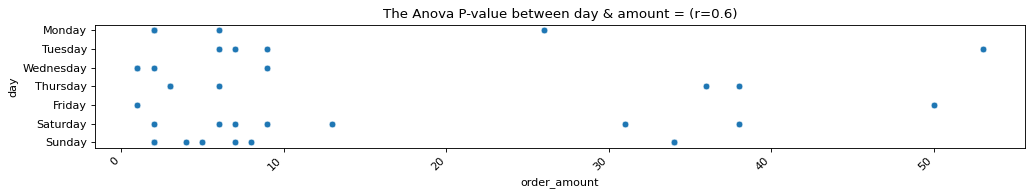

In [37]:
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Assumption(H0) is that day and times are NOT correlated
 
# Finds out the Prices data for each FuelType as a list
CategoryGroupLists=df_orders.groupby('day', observed = False)['order_amount'].apply(list)
 
# Performing the ANOVA test
# We reject the Assumption(H0) only when P-Value < 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

figure(figsize=(15, 2), dpi=80)
plt.xticks(rotation=45, ha='right')

sns.scatterplot(data=df_orders, x='order_amount', y='day')

# get the Pearson correlation between both variables
current_corr = round(AnovaResults[1], 2)

# give the graph a title and labels
plt.title(f"The Anova P-value between day & amount = (r={current_corr})")

# call the graph (show function)
plt.grid(False)
plt.show()

From this graph, it does not seem like the day matters to decide how many items this household (HH) would buy

### 2.2.4.2 AMOUNT vs TIME

P-Value for Anova is:  0.0038757329857045746


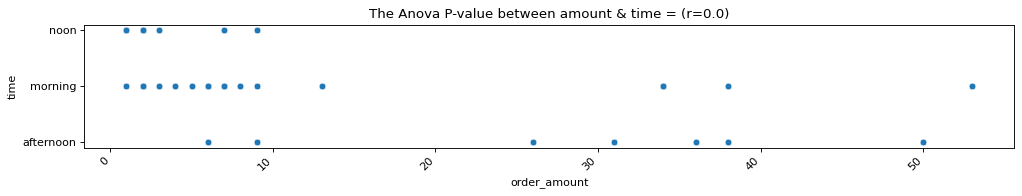

In [38]:
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Assumption(H0) is that day and times are NOT correlated
 
# Finds out the Prices data for each FuelType as a list
CategoryGroupLists=df_orders.groupby('time', observed = False)['order_amount'].apply(list)
 
# Performing the ANOVA test
# We reject the Assumption(H0) only when P-Value < 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

figure(figsize=(15, 2), dpi=80)
plt.xticks(rotation=45, ha='right')

sns.scatterplot(data=df_orders, x='order_amount', y='time')

# get the Pearson correlation between both variables
current_corr = round(AnovaResults[1], 2)

# give the graph a title and labels
plt.title(f"The Anova P-value between amount & time = (r={current_corr})")

# call the graph (show function)
plt.grid(False)
plt.show()

We can see that they usually buy less items at noon than they would in the morning or the afternoon (this can be linked back to the knowledge that noon groceries are usually done by one of the household members while at work, to buy lunch)

### 2.2.4.3 AMOUNT vs STORE

#### Store TYPE

P-Value for Anova is:  0.035933601268316885


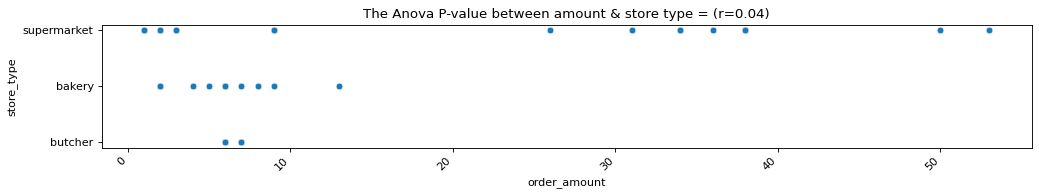

In [39]:
# aggregate "other" store types
df_orders.loc[:,('store_type')] = df_orders.loc[:,('store_type')].replace(['drugstore', 'furniture store'], 'other')

# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Assumption(H0) is that day and times are NOT correlated
 
# Finds out the Prices data for each FuelType as a list
CategoryGroupLists=df_orders.groupby('store_type', observed = False)['order_amount'].apply(list)
 
# Performing the ANOVA test
# We reject the Assumption(H0) only when P-Value < 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

figure(figsize=(15, 2), dpi=80)
plt.xticks(rotation=45, ha='right')

sns.scatterplot(data=df_orders, x='order_amount', y='store_type')

# get the Pearson correlation between both variables
current_corr = round(AnovaResults[1], 2)

# give the graph a title and labels
plt.title(f"The Anova P-value between amount & store type = (r={current_corr})")

# call the graph (show function)
plt.grid(False)
plt.show()

There is a much larger variety in item amounts per grocery visit for supermarkets, the largers orders are also from supermarkets. For the other store types, there does not really seem to be any difference.

#### Store NAME

P-Value for Anova is:  2.8265148584414773e-07


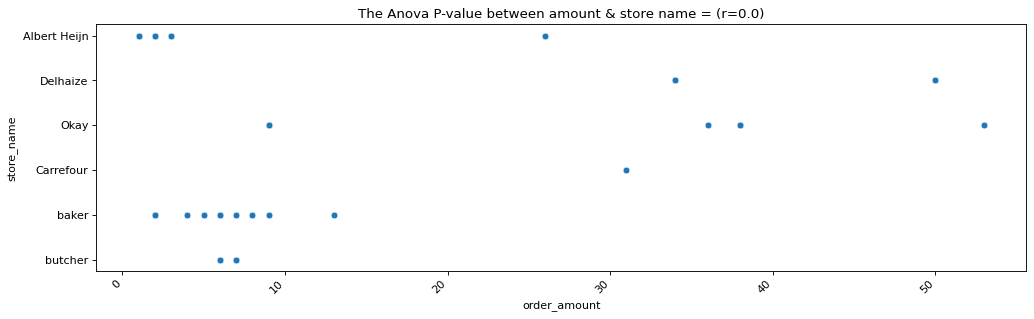

In [40]:
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Assumption(H0) is that day and times are NOT correlated
 
# Finds out the Prices data for each FuelType as a list
CategoryGroupLists=df_orders.groupby('store_name', observed = False)['order_amount'].apply(list)
 
# Performing the ANOVA test
# We reject the Assumption(H0) only when P-Value < 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

# order x and y axis chronologically
order = ['supermarket', 'bakery', 'butcher']
df_orders['store_type'] = pd.Categorical(df_orders['store_type'], order)
df_orders.sort_values(by=['store_type'], inplace=True)

# identify what each store name is (baker, butcher, or other)
df_orders['store_name'] = df_orders['store_name'].replace(['Sys'], 'Sys: baker')
df_orders['store_name'] = df_orders['store_name'].replace(['Brabo'], 'Brabo: butcher')
df_orders['store_name'] = df_orders['store_name'].replace(['Versavel Poelman'], 'Versavel Poelman: butcher')
df_orders['store_name'] = df_orders['store_name'].replace(['Ikea'], 'Ikea: other')
df_orders['store_name'] = df_orders['store_name'].replace(['Kruidvat'], 'Kruidvat: other')


figure(figsize=(15, 4), dpi=80)
plt.xticks(rotation=45, ha='right')

sns.scatterplot(data=df_orders, x='order_amount', y='store_name')

# get the Pearson correlation between both variables
current_corr = round(AnovaResults[1], 2)

# give the graph a title and labels
plt.title(f"The Anova P-value between amount & store name = (r={current_corr})")

# call the graph (show function)
plt.grid(False)
plt.show()

From this, we learn that also within the different supermarket stores, different amounts of groceries would be bought. For example. they would be likely to buy a small amount of items (less than 10) at Albert Heijn, while this does not seem to occur (yet) at Delhaize or Carrefour, only once at Okay (unable to rule this out as an outlier due to the limited dataset). For bakers, butchers, and other stores, it does not seem to matter which one they shop at.

Let's aggregate all bakers, butchers, and other stores.

P-Value for Anova is:  2.8265148584414773e-07


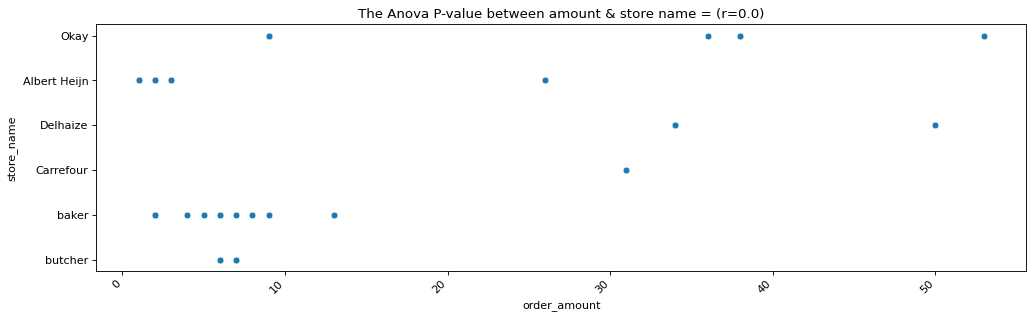

In [41]:
# Create a dataframe for just the orders (not all individual items)
df_orders = df[['week', 'order_ID', 'store_name', 'storename_num', 'store_type', 'storetype_num','day', 'day_num', 'time', 'time_num', 'timestamp', 'order_amount', 'order_price']]
df_orders = df_orders.drop_duplicates()

# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Assumption(H0) is that day and times are NOT correlated
 
# Finds out the Prices data for each FuelType as a list
CategoryGroupLists=df_orders.groupby('store_name', observed = False)['order_amount'].apply(list)
 
# Performing the ANOVA test
# We reject the Assumption(H0) only when P-Value < 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

# order x and y axis chronologically
order = ['supermarket', 'bakery', 'butcher']
df_orders['store_type'] = pd.Categorical(df_orders['store_type'], order)
df_orders.sort_values(by=['store_type'], inplace=True)

# identify what each store name is (baker, butcher, or other)
df_orders['store_name'] = df_orders['store_name'].replace(['Sys'], 'baker')
df_orders['store_name'] = df_orders['store_name'].replace(['Brabo', 'Versavel Poelman'], 'butcher')
df_orders['store_name'] = df_orders['store_name'].replace(['Ikea', 'Kruidvat'], 'other')

figure(figsize=(15, 4), dpi=80)
plt.xticks(rotation=45, ha='right')

sns.scatterplot(data=df_orders, x='order_amount', y='store_name')

# get the Pearson correlation between both variables
current_corr = round(AnovaResults[1], 2)

# give the graph a title and labels
plt.title(f"The Anova P-value between amount & store name = (r={current_corr})")

# call the graph (show function)
plt.grid(False)
plt.show()

### CONCLUSION (2.2.4. Item amounts)

##### If they go to store X (on day Y) => at X time (morning, noon, afternoon)

We now have an idea for the first two steps in generating week 9 groceries:
> 1. It is <b>day X</b>

> 2. The HH will shop at <b>store NAME X</b>

> 3. The HH will shop at <b>time X</b> (morning; noon; afternoon -- related to store type)

> 4. The HH will buy <b>X amount</b> of items (related to time and store name, but aggregate butchers, bakeries, and other stores)

## 2.2.5. CATEGORIES
From the correlation heatmap of the complete dataset we knew that there was a correlation of 0.34 between category and store type, and -0.3 with store name, which is at least interesting enough to explore further.

### 2.2.5.1 CATEGORIES VS STORE TYPE

In [42]:
# aggregate "other" store types
df.loc[:,('store_type')] = df.loc[:,('store_type')].replace(['drugstore', 'furniture store'], 'other')

# Cross tabulation between category and store type
CrosstabResult =pd.crosstab(index=df['category'],columns=df['store_type'])
CrosstabResult

store_type,bakery,butcher,supermarket
category,,,
bakery,32,0,5
beverages,0,0,23
breakfast & spreads,0,0,8
canned foods,0,0,13
condiments,0,0,5
cooking aid,0,0,4
dairy & plant based,1,1,52
frozen foods,0,0,16
fruit & vegetables,0,0,95


> This makes a lot of sense; bakery items are mainly bought at the bakery, though sometimes they also buy meat,fish, & veggie at the bakery (we know that this is a meat spread from the interviews) and sometimes dairy (butter). Fruit & vegetables are by far the most popular category in the supermarket. Other stores (Ikea, Kruidvat) are for care & hygiene and beverages, sometimes snacks. 

### 2.2.5.2 CATEGORIES VS STORE NAME

In [43]:
# Cross tabulation between category and store type
CrosstabResult =pd.crosstab(index=df['category'],columns=df['store_name'])
CrosstabResult

store_name,Albert Heijn,Carrefour,Delhaize,Okay,baker,butcher
category,,,,,,
bakery,1,0,3,1,32,0
beverages,2,0,10,11,0,0
breakfast & spreads,1,1,1,5,0,0
canned foods,0,1,1,11,0,0
condiments,0,1,2,2,0,0
cooking aid,0,0,0,4,0,0
dairy & plant based,5,8,16,23,1,1
frozen foods,0,0,1,15,0,0
fruit & vegetables,16,12,40,27,0,0


> Delhaize is by far most popular for their fruit & vegetables, followed by Okay (these are also just the most popular supermarkets for this household). Okay does seem to be the most popular supermarket for frozen foods and canned foods over the other supermarkets. 

### 2.2.5.3 CATEGORIES VS WEEK

In [44]:
# Cross tabulation between category and store type
CrosstabResult =pd.crosstab(index=df['category'],columns=df['week'])
display(CrosstabResult)

week,1,2,3,4,5,6,7,8
category,,,,,,,,
bakery,5,6,9,5,6,5,0,1
beverages,5,2,4,0,7,2,1,2
breakfast & spreads,1,1,2,1,1,1,0,1
canned foods,4,3,2,1,3,0,0,0
condiments,0,2,0,1,0,2,0,0
cooking aid,0,1,0,0,3,0,0,0
dairy & plant based,5,4,13,8,11,7,1,5
frozen foods,0,1,2,0,11,0,2,0
fruit & vegetables,21,7,9,13,21,11,2,11


> Per week, the categories vary (they buy different things more or less per week; e.g., 9 bakery in week 3 but none in week 8). They don't buy frozen foods often, though they stocked up on them in week 11 (at Okay). 
Thus we cannot easily use this as a steady limit variable; it is hard to know when they will buy more or less of something. 

### 2.2.5.4 CATEGORIES VS DAY & VS TIME

Although there really is no indication that there would be any correlation there, let's see how categories are spread accross time (day and times)

In [45]:
df = pd.read_csv (r"/workspaces/DesignerlyAlgorithmicPrototyping/database/DATA-HH (dummy).csv")

# make sure the days of the week are in the right order
df['day'] = pd.Categorical(df['day'], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df=df.sort_values(by='day')

# aggregate afternoon and evening
df['time'] = df['time'].replace(['afternoon', 'evening'], 'afternoon')

# Cross tabulation between category and store type
CrosstabResult =pd.crosstab(index=df['category'],columns=df['day'])
display(CrosstabResult)

day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
category,,,,,,,
bakery,3,4,3,1,2,8,16
beverages,2,4,0,3,5,4,5
breakfast & spreads,1,2,0,3,0,1,1
canned foods,0,3,0,5,1,4,0
condiments,0,0,0,2,0,1,2
cooking aid,0,3,0,1,0,0,0
dairy & plant based,6,6,0,11,4,15,12
frozen foods,0,4,0,2,0,9,1
fruit & vegetables,8,9,4,8,22,24,20


In [46]:
# make sure the days of the week are in the right order
df['day'] = pd.Categorical(df['day'], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df=df.sort_values(by='day')

# aggregate weekday and weekend
df.loc[:,('day')] = df.loc[:,('day')].replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], 'weekday')
df.loc[:,('day')] = df.loc[:,('day')].replace(['Saturday', 'Sunday'], 'weekend')

# aggregate afternoon and evening
df['time'] = df['time'].replace(['afternoon', 'evening'], 'afternoon')

# Cross tabulation between category and store type
CrosstabResult =pd.crosstab(index=df['category'],columns=df['day'])
display(CrosstabResult)

/tmp/ipykernel_12287/3322456797.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.loc[:,('day')] = df.loc[:,('day')].replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], 'weekday')
/tmp/ipykernel_12287/3322456797.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['weekday', 'weekday', 'weekday', 'weekday', 'weekday', ..., 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday']
Length: 353
Categories (3, object): ['weekday', 'Saturday', 'Sunday']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df.loc[:,('day')] = df.loc[:,('day')].replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], 'weekday')
/tmp/ipykernel_12287/3322456797.py:7: Fut

day,weekday,weekend
category,,
bakery,13,24
beverages,14,9
breakfast & spreads,6,2
canned foods,9,4
condiments,2,3
cooking aid,4,0
dairy & plant based,27,27
frozen foods,6,10
fruit & vegetables,51,44


> Beyond bakery items in the weekend, and many of the smaller categories during the week (cooking aid, non-food, pasta & rice...), there is no real pattern to be spotted in these crosstabs.

In [47]:
# make sure the days of the week are in the right order
df['day'] = pd.Categorical(df['day'], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df=df.sort_values(by='day')

# aggregate afternoon and evening
df['time'] = df['time'].replace(['afternoon', 'evening'], 'afternoon')

# Cross tabulation between category and store type
CrosstabResult =pd.crosstab(index=df['category'],columns=df['time'])
display(CrosstabResult)

time,afternoon,morning,noon
category,,,
bakery,4,30,3
beverages,11,12,0
breakfast & spreads,5,2,1
canned foods,7,3,3
condiments,3,2,0
cooking aid,1,3,0
dairy & plant based,29,24,1
frozen foods,4,12,0
fruit & vegetables,44,43,8


> Same here; bakery seems to be in the morning, and the biggest noon category is fruit & veggies. Other than that no noteable patterns.

## 2.2.6. ITEM TYPES

In [48]:
df = pd.read_csv (r"/workspaces/DesignerlyAlgorithmicPrototyping/database/DATA-HH (dummy).csv")
# df.describe(include='all')
# aggregate afternoon and evening
df['time'] = df['time'].replace(['afternoon', 'evening'], 'afternoon')

# aggregate "other" store types
df.loc[:,('store_type')] = df.loc[:,('store_type')].replace(['drugstore', 'furniture store'], 'other')

#### 2.2.6.1 item type vs promo

In [49]:
# Cross tabulation between category and store type
CrosstabResult =pd.crosstab(index=df['item_type'],columns=df['promo_num'])

CrosstabResult

promo_num,0,1
item_type,,
alcoholic drinks,1,0
almond milk,1,0
andalouse sauce,1,0
apple sauce,4,0
apples,2,0
...,...,...
tomato paste,2,0
tomatoes,5,0
tonic,1,0


We could separate items that are more often than not bought when they are in promo

##### (if for promo #1>#0)

In [50]:
CrosstabResult.drop(CrosstabResult[CrosstabResult[1] <= CrosstabResult[0]].index, inplace = True)
CrosstabResult = CrosstabResult.reset_index()
CrosstabResult

promo_num,item_type,0,1


In [51]:
promoitems = CrosstabResult.item_type.values.tolist()
promoitems

[]

> It might be sensible to remove these items from the dataframe since we have no control over whether the store they will visit in week 9 will have these items in promo

# CONCLUSION (final)

##### If they go to store X (on day Y) => at X time (morning, noon, afternoon)

We now have an idea for the first two steps in generating week 9 groceries:
> 1. It is <b>day X</b>

> 2. The HH will shop at <b>store NAME X</b>

> 3. The HH will shop at <b>time X</b> (morning; noon; afternoon -- related to store type)

> 4. The HH will buy <b>X amount</b> of items (related to time and store name, but aggregate butchers, bakeries, and other stores)

> 5. The HH will buy different <b>items</b> (within item categories) depending on the store name, and time of day + we excluded items that were most often bought when in promo

## Save final dataframe

In [52]:
# filter the rows that contain the item types from the above list
filter = df['item_type'].isin(promoitems)
df = df[~filter]

# aggregate afternoon and evening
df.loc[:,('time')] = df.loc[:,('time')].replace(['afternoon', 'evening'], 'afternoon')

# aggregate "other" store types
df.loc[:,('store_type')] = df.loc[:,('store_type')].replace(['drugstore', 'furniture store'], 'other')

# Also save a dataframe for the others, with aggregation of bakeries, butchers, and other stores (since their order variables do not differ individually)
df['store_name'] = df['store_name'].replace(['Sys'], 'baker')
df['store_name'] = df['store_name'].replace(['Brabo', 'Versavel Poelman'], 'butcher')
df['store_name'] = df['store_name'].replace(['Ikea', 'Kruidvat'], 'other')
# since it is very hard to specify what they would buy from these other stores, it might be best to filter them out of the df for now
other = ['other']
filter2 = df['store_name'].isin(other)
df = df[~filter2]

df.head()

,week,order_ID,item_name,amount,price_unit,price_total,date,day,timestamp,time,...,item_id,type_id,order_amount,order_price,day_num,storetype_num,storename_num,cat_num,time_num,promo_num
0,1,1,RABEKO choco light 250g,2,2.82,5.64,2021-11-23,Tuesday,12:32:00,noon,...,0,0,9,16.77,5,4,6,2,3,0
1,1,1,JOYVALLE pudding griesmeel natuur 135g,4,0.99,3.96,2021-11-23,Tuesday,12:32:00,noon,...,1,1,9,16.77,5,4,6,7,3,0
2,1,1,BONI tomatensoep met balletjes 950ml,1,1.99,1.99,2021-11-23,Tuesday,12:32:00,noon,...,2,2,9,16.77,5,4,6,3,3,0
3,1,1,LIEBIG DELISOUP 9 groenten brik 1L,1,2.59,2.59,2021-11-23,Tuesday,12:32:00,noon,...,3,2,9,16.77,5,4,6,3,3,0
4,1,1,LIEBIG DELISOUP tom. Balletjes brik 1L,1,2.59,2.59,2021-11-23,Tuesday,12:32:00,noon,...,4,2,9,16.77,5,4,6,3,3,0


In [53]:
df.to_csv(r"/workspaces/DesignerlyAlgorithmicPrototyping/database/DATA-HH (dummy).csv", index=False)

In [54]:
# Save a dataframe for just the orders (not all individual items)
df_orders = df[['week', 'order_ID', 'store_name', 'storename_num', 'store_type', 'storetype_num','day', 'day_num', 'time', 'time_num', 'timestamp', 'order_amount', 'order_price']]
df_orders = df_orders.drop_duplicates()
df_orders.to_csv(r"/workspaces/DesignerlyAlgorithmicPrototyping/database/DATA-HH (dummy-orders).csv", index=False)